# Human results

<p style="text-align:justify;">
Figure 6 summarizes the results from human datasets submitted to this challenge, showing mean and standard deviation T1 values from the WM (genu) and GM (cerebral cortex) ROIs. The top plot collapses all datasets for each site, while the bottom plot shows each dataset separately. Mean WM T1 values across all submissions was 828 ± 38 ms in the genu and 854 ± 50 ms in the splenium, and mean GM T1 values were 1548 ± 156 ms in the cortex and 1188 ± 133 ms in the deep GM, with less variations overall in WM compared to GM possibly due to better ROI placement and less partial voluming in WM. Inter-participant coefficients of variation (COV) for independently-implemented imaging protocols were calculated using one T1 map measurement per submission that most closely matched the proposed protocol, and were 6.0% for genu, 11% for splenium, 16% for cortical GM and 22% for deep GM. One site (site 9) measured multiple subjects on three scanners using two different vendors, and so intra-participant COVs for these centrally-implemented protocols were calculated over acquired T1 maps from this site, and were 2.9% for genu, 3.5% for splenium, 6.9 % for cortical GM and 7.8% for deep GM. It’s important that this site also had the best slice positioning, cutting through the AC-PC line and genu for proper ROI placement, particularly for the corpus callosum and deep GM.
</p>

<p style="text-align:justify;">
<b>
Figure 6. Mean T1 values in two sets of ROIs, white matter (one 5x5 voxel ROI, genu) and gray matter (three 3x3 voxel ROIs, cortex). Top figure shows all datasets collapsed into sites, whereas the bottom shows each individual dataset.
</b>
</p>

In [1]:
from os import path

if path.isdir('analysis')== False:
    !git clone https://github.com/rrsg2020/analysis.git

# Imports
import warnings
warnings.filterwarnings("ignore")

from pathlib import Path
import pandas as pd
import nibabel as nib
import numpy as np

from analysis.src.database import *
import matplotlib.pyplot as plt
plt.style.use('analysis/custom_matplotlibrc')
plt.rcParams["figure.figsize"] = (20,5)
fig_id = 0

# Configurations

database_path = Path('analysis/databases/3T_human_T1maps_database.pkl')
output_folder = Path("analysis/plots/08_wholedataset_scatter_Human/")

estimate_type = 'mean' # median or mean

# Define functions

def plot_both_scatter(x1, x2, y, y_std,
                      title, x1_label, x2_label, y_label,
                      file_prefix, folder_path, fig_id):
    
    plt.rcParams["figure.figsize"] = (20,10)

    fig, axs = plt.subplots(2)
    fig.suptitle(title)
    axs[0].errorbar(x1, y, y_std, fmt='o', solid_capstyle='projecting')
    axs[0].set_xlabel(x1_label)
    axs[0].set_ylabel(y_label)
    axs[0].set_xticks(np.arange(0, np.max(x1), step=1))


    axs[1].errorbar(x2, y, y_std, fmt='o', solid_capstyle='projecting')
    axs[1].set_xlabel(x2_label)
    axs[1].set_ylabel(y_label)
    axs[1].set_xticklabels(labels=x2, rotation=90)


    if fig_id<10:
        filename = "0" + str(fig_id) + "_" + file_prefix
    else:
        filename = str(fig_id) + "_" + file_prefix

    fig.savefig(folder_path / (str(filename) + '.svg'), facecolor='white')
    fig.savefig(folder_path / (str(filename) + '.png'), facecolor='white')
    fig_id = fig_id + 1
    plt.show()
    return fig_id

# Load database

df = pd.read_pickle(database_path)

genu_estimate = np.array([])
genu_std = np.array([])
splenium_estimate = np.array([])
splenium_std = np.array([])
deepgm_estimate = np.array([])
deepgm_std = np.array([])
cgm_estimate = np.array([])
cgm_std = np.array([])

ii = 0
for index, row in df.iterrows():
    
    if estimate_type is 'mean':
        genu_estimate = np.append(genu_estimate, np.mean(df.loc[index]['T1 - genu (WM)']))
        genu_std = np.append(genu_std, np.std(df.loc[index]['T1 - genu (WM)']))
        splenium_estimate = np.append(splenium_estimate, np.mean(df.loc[index]['T1 - splenium (WM)']))
        splenium_std = np.append(splenium_std, np.std(df.loc[index]['T1 - splenium (WM)']))
        deepgm_estimate = np.append(deepgm_estimate, np.mean(df.loc[index]['T1 - deep GM']))
        deepgm_std = np.append(deepgm_std, np.std(df.loc[index]['T1 - deep GM']))
        cgm_estimate = np.append(cgm_estimate, np.mean(df.loc[index]['T1 - cortical GM']))
        cgm_std = np.append(cgm_std, np.std(df.loc[index]['T1 - cortical GM']))
    elif estimate_type is 'median':
        genu_estimate = np.append(genu_estimate, np.median(df.loc[index]['T1 - genu (WM)']))
        genu_std = np.append(genu_std, np.std(df.loc[index]['T1 - genu (WM)']))
        splenium_estimate = np.append(splenium_estimate, np.median(df.loc[index]['T1 - splenium (WM)']))
        splenium_std = np.append(splenium_std, np.std(df.loc[index]['T1 - splenium (WM)']))
        deepgm_estimate = np.append(deepgm_estimate, np.median(df.loc[index]['T1 - deep GM']))
        deepgm_std = np.append(deepgm_std, np.std(df.loc[index]['T1 - deep GM']))
        cgm_estimate = np.append(cgm_estimate, np.median(df.loc[index]['T1 - cortical GM']))
        cgm_std = np.append(cgm_std, np.std(df.loc[index]['T1 - cortical GM']))
    else:
        Exception('Unsupported dataset estimate type.')
    ii = ii +1

# Store the IDs
indexes_numbers = df.index
indexes_strings = indexes_numbers.map(str)

x1_label='Site #'
x2_label='Site #.Meas #'
y_label="T$_1$ (ms)"
file_prefix = 'WM_and_GM'
folder_path=output_folder

x1=indexes_numbers
x2=indexes_strings
y=genu_estimate
y_std=genu_std



<>:78: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:87: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:78: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:87: SyntaxWarning: "is" with a literal. Did you mean "=="?


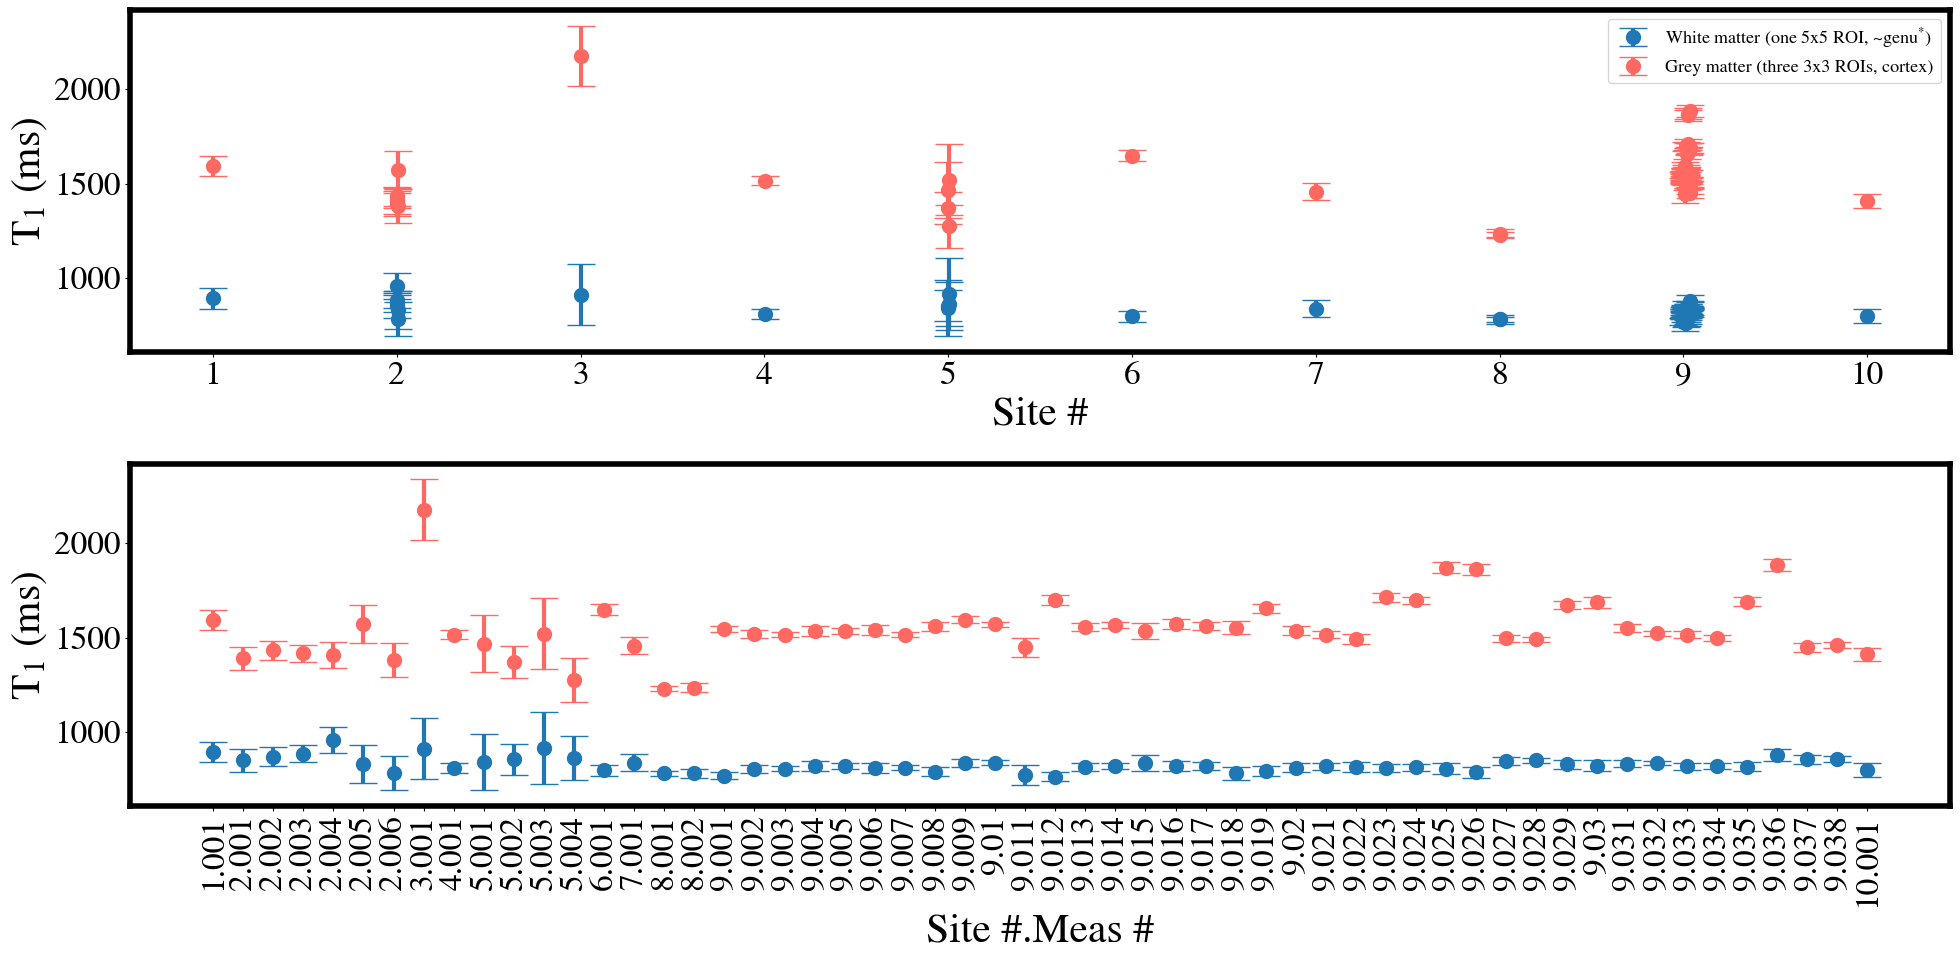

In [2]:
# Plot
plt.rcParams["figure.figsize"] = (20,10)

fig, axs = plt.subplots(2)
axs[0].errorbar(x1, y, y_std, fmt='o', solid_capstyle='projecting')
axs[0].set_xlabel(x1_label)
axs[0].set_ylabel(y_label)
axs[0].set_xticks(np.arange(0, np.max(x1), step=1))


axs[1].errorbar(x2, y, y_std, fmt='o', solid_capstyle='projecting')
axs[1].set_xlabel(x2_label)
axs[1].set_ylabel(y_label)
axs[1].set_xticklabels(labels=x2, rotation=90)

x1=indexes_numbers
x2=indexes_strings
y=cgm_estimate
y_std=genu_std

axs[0].errorbar(x1, y, y_std, color='#FF6961', fmt='o', solid_capstyle='projecting')
axs[0].set_xlabel(x1_label)
axs[0].set_ylabel(y_label)

axs[1].errorbar(x2, y, y_std, color='#FF6961', fmt='o', solid_capstyle='projecting')
axs[1].set_xlabel(x2_label)
axs[1].set_ylabel(y_label)
axs[1].set_xticklabels(labels=x2, rotation=90)

axs[0].legend((r'White matter (one 5x5 ROI, ~genu$\mathregular{^{*}}$)', 'Grey matter (three 3x3 ROIs, cortex)'))

if fig_id<10:
    filename = "0" + str(fig_id) + "_" + file_prefix
else:
    filename = str(fig_id) + "_" + file_prefix

fig.savefig(folder_path / (str(filename) + '.svg'), facecolor='white')
fig.savefig(folder_path / (str(filename) + '.png'), facecolor='white')
fig_id = fig_id + 1

plt.show()